In [98]:
#Imports
#General Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

#Sklearn imports
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor




In [99]:
#Setting the data frame and loading data
df = pd.read_csv('dielectron.csv')
df.head()

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,147115,366639895,58.71410,-7.31132,10.531000,-57.29740,12.82020,-2.20267,2.17766,1,11.2836,-1.032340,-1.88066,-11.0778,2.14537,-2.344030,-2.072810,-1,8.94841
1,147115,366704169,6.61188,-4.15213,-0.579855,-5.11278,4.19242,-1.02842,-3.00284,-1,17.1492,-11.713500,5.04474,11.4647,12.75360,0.808077,2.734920,1,15.89300
2,147115,367112316,25.54190,-11.48090,2.041680,22.72460,11.66100,1.42048,2.96560,1,15.8203,-1.472800,2.25895,-15.5888,2.69667,-2.455080,2.148570,1,38.38770
3,147115,366952149,65.39590,7.51214,11.887100,63.86620,14.06190,2.21838,1.00721,1,25.1273,4.087860,2.59641,24.6563,4.84272,2.330210,0.565865,-1,3.72862
4,147115,366523212,61.45040,2.95284,-14.622700,-59.61210,14.91790,-2.09375,-1.37154,-1,13.8871,-0.277757,-2.42560,-13.6708,2.44145,-2.423700,-1.684810,-1,2.74718


In [100]:
#Cleaning data
#Check for duplicates
print(df.duplicated().sum())

#Remove duplicates
df = df.drop_duplicates()

#Check that duplicates were dropped
print(df.duplicated().sum())

#Checking for null data
print(df.isnull().sum())

#Dropping null data
df = df.dropna()

#Checking that null data was dropped on M 
print(df.isnull().sum())


23
0
Run       0
Event     0
E1        0
px1       0
py1       0
pz1       0
pt1       0
eta1      0
phi1      0
Q1        0
E2        0
px2       0
py2       0
pz2       0
pt2       0
eta2      0
phi2      0
Q2        0
M        85
dtype: int64
Run      0
Event    0
E1       0
px1      0
py1      0
pz1      0
pt1      0
eta1     0
phi1     0
Q1       0
E2       0
px2      0
py2      0
pz2      0
pt2      0
eta2     0
phi2     0
Q2       0
M        0
dtype: int64


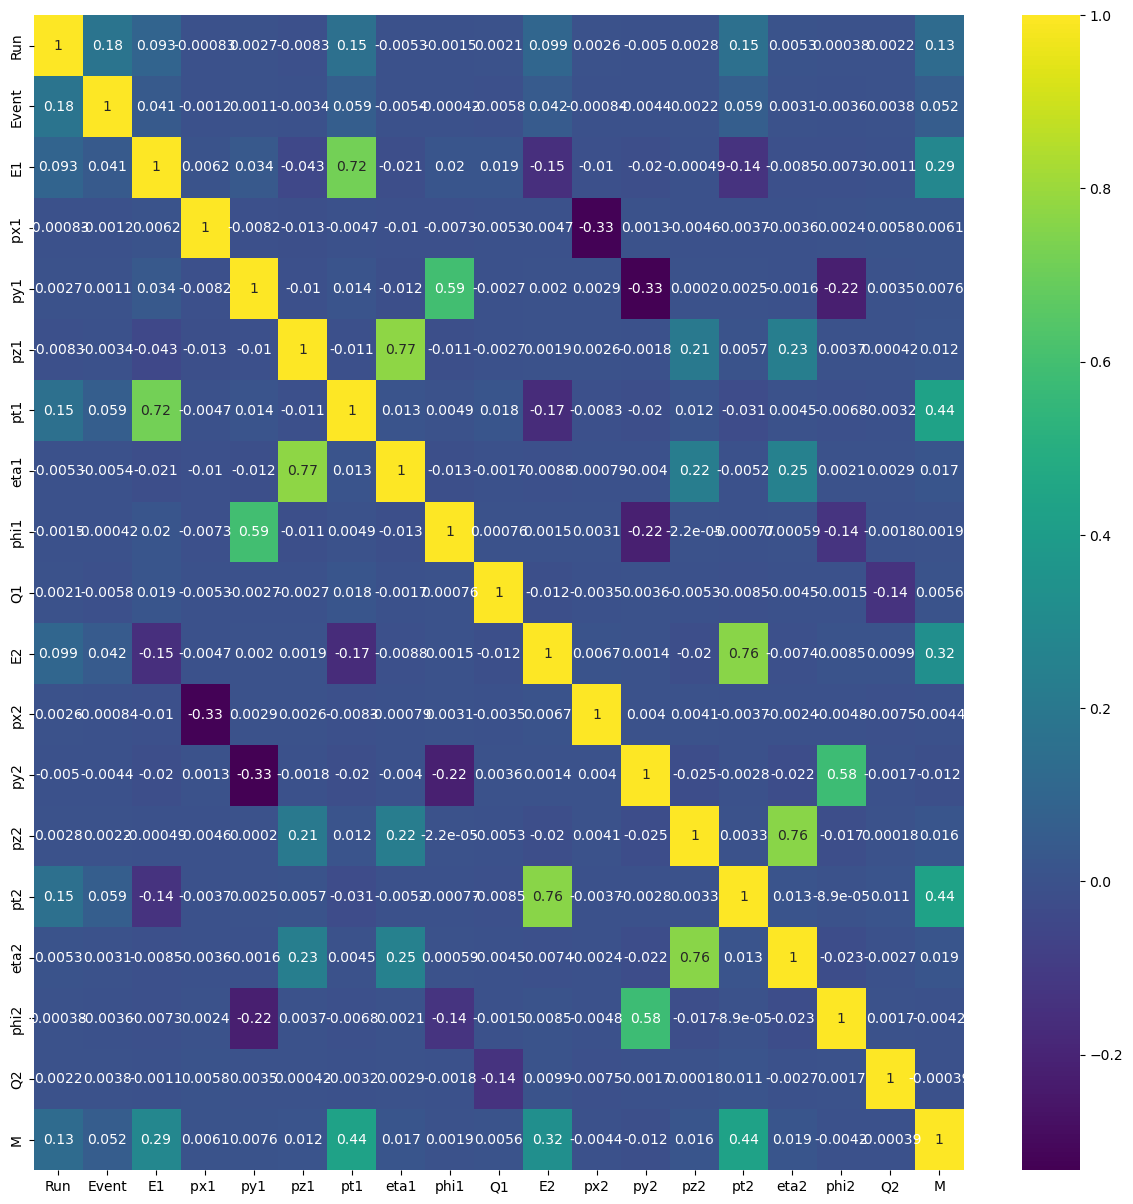

In [101]:
#Finding correlation with seaborn heat map
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), cbar=True, cmap='viridis', annot=True,)
plt.show()

In [102]:
#Spliting training data
X = df.drop(columns='M')
y = df['M']

#Train test split of 80 - 20
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [103]:
#Scaling data
scaler = StandardScaler()

X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.fit_transform(X_test)

In [104]:
#KNN regression

knn = KNeighborsRegressor(n_neighbors=6)

#Training the KNN regression model with data
knn.fit(X_train_scl, y_train)
#Prediction of Mass using KNN
knn_pred = knn.predict(X_test_scl)

#R2 score, MQE, and MAE
print(f'This is the R2 score for KNN regression {r2_score(y_test,knn_pred)}')
print(f'This is the MQE for KNN regression {mean_squared_error(y_test, knn_pred)}')
print(f'This is the MAE for KNN regression {mean_absolute_error(y_test, knn_pred)}')

This is the R2 score for KNN regression 0.8687490915004965
This is the MQE for KNN regression 85.49377202898616
This is the MAE for KNN regression 5.92625011094983


With one neigbor:
This is the R2 score for KNN regression 0.7869849410836003
This is the MQE for KNN regression 138.50741117359993
This is the MAE for KNN regression 7.664641044096301

With three neigbors:
This is the R2 score for KNN regression 0.8579793714730155
This is the MQE for KNN regression 92.34515949522715
This is the MAE for KNN regression 6.18995990173015

With five neigbors:
This is the R2 score for KNN regression 0.8669316497471079
This is the MQE for KNN regression 86.52417719398605
This is the MAE for KNN regression 5.978115233995696

Past 5 neigbors R2 change is negligible 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


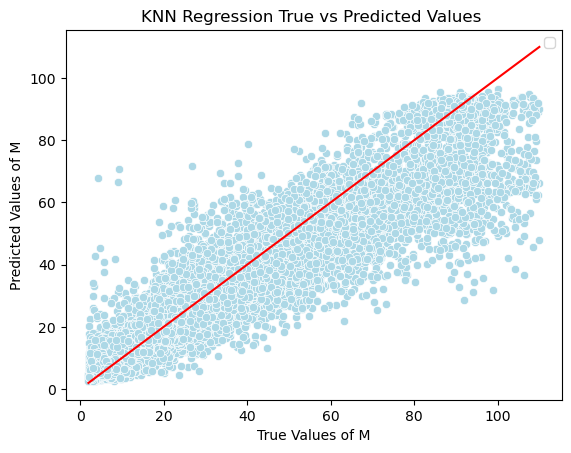

In [105]:
#KNN Regression plot
#Making the plot
sns.scatterplot(x = y_test, y = knn_pred, color='lightblue')
#calculating true value line
knn_max = y_test.max()
knn_min = y_test.min()
#plotting true value line
sns.lineplot(x = [knn_max, knn_min], y = [knn_max, knn_min], color='red')

#Labeling plot
plt.xlabel('True Values of M')
plt.ylabel('Predicted Values of M')
plt.title('KNN Regression True vs Predicted Values ')
plt.legend()
plt.show()

## Linear Regression

In [106]:
#Creating and training the data on linear regression model
lin_mod = LinearRegression()
lin_mod = lin_mod.fit(X_train_scl, y_train)

lin_pred = lin_mod.predict(X_test_scl)

print(f'This is the R2 score for linear regression {r2_score(y_test,lin_pred)}')
print(f'This is the MQE for linear regression {mean_squared_error(y_test, lin_pred)}')
print(f'This is the MAE for linear regression {mean_absolute_error(y_test, lin_pred)}')

This is the R2 score for linear regression 0.4230574163325821
This is the MQE for linear regression 375.8069051542076
This is the MAE for linear regression 14.171190550144381


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


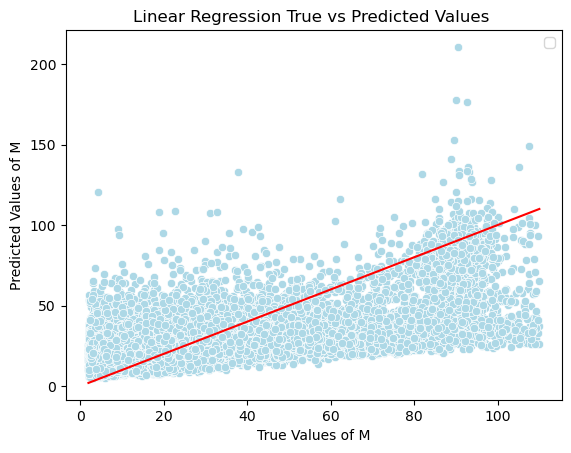

In [107]:
#Linear Regression plot
#Making the plot
sns.scatterplot(x = y_test, y = lin_pred, color='lightblue')
#calculating true value line
lin_max = y_test.max()
lin_min = y_test.min()
#plotting true value line
sns.lineplot(x = [lin_max, lin_min], y = [lin_max, lin_min], color='red')

#Labeling plot
plt.xlabel('True Values of M')
plt.ylabel('Predicted Values of M')
plt.title('Linear Regression True vs Predicted Values ')
plt.legend()
plt.show()

## Neural Network Exploration
### Using Scikit MLP model

In [108]:
mlp = MLPRegressor(activation='relu', solver='adam', max_iter=200)
mlp = mlp.fit(X_train_scl, y_train)
mlp_pred = mlp.predict(X_test_scl)

print(f'This is the R2 score for linear regression {r2_score(y_test,mlp_pred)}')
print(f'This is the MQE for linear regression {mean_squared_error(y_test, mlp_pred)}')
print(f'This is the MAE for linear regression {mean_absolute_error(y_test, mlp_pred)}')

This is the R2 score for linear regression 0.9952869795710251
This is the MQE for linear regression 3.069951276750649
This is the MAE for linear regression 1.2687695202114544


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


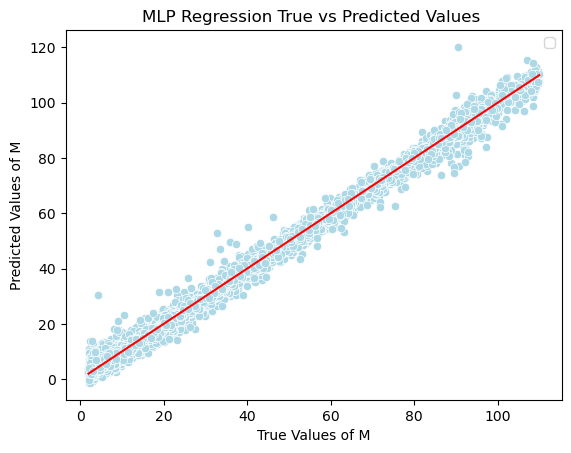

In [110]:
#MLP Regression plot
#Making the plot
sns.scatterplot(x = y_test, y = mlp_pred, color='lightblue')
#calculating true value line
mlp_max = y_test.max()
mlp_min = y_test.min()
#plotting true value line
sns.lineplot(x = [mlp_max, mlp_min], y = [mlp_max, mlp_min], color='red')

#Labeling plot
plt.xlabel('True Values of M')
plt.ylabel('Predicted Values of M')
plt.title('MLP Regression True vs Predicted Values ')
plt.legend()
plt.show()